<a href="https://colab.research.google.com/github/Vasudha-pai/Molecular-Property-Prediction-Solubility---ESOL-Dataset-/blob/main/molecular_property_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Molecular Property Prediction** (solubility - ESOL dataset)

In [1]:
# Step 1: Install and Import Libraries.
#Install RDKit
!pip install rdkit-pypi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 14.5 MB/s eta 0:00:00


In [4]:
#importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from rdkit import Chem
from rdkit.Chem import Descriptors

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [6]:
#step 2: Loading the dataset
# Load ESOL dataset (already cleaned)
url = "https://deepchemdata.s3-us-west-1.amazonaws.com/datasets/delaney-processed.csv"
df = pd.read_csv(url)

df.head()


,Compound ID,ESOL predicted log solubility in mols per litre,Minimum Degree,Molecular Weight,Number of H-Bond Donors,Number of Rings,Number of Rotatable Bonds,Polar Surface Area,measured log solubility in mols per litre,smiles
0,Amigdalin,-0.974,1,457.432,7,3,7,202.32,-0.77,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...
1,Fenfuram,-2.885,1,201.225,1,2,2,42.24,-3.30,Cc1occc1C(=O)Nc2ccccc2
2,citral,-2.579,1,152.237,0,0,4,17.07,-2.06,CC(C)=CCCC(C)=CC(=O)
3,Picene,-6.618,2,278.354,0,5,0,0.00,-7.87,c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43
4,Thiophene,-2.232,2,84.143,0,1,0,0.00,-1.33,c1ccsc1


In [7]:
# step 3 Compute Molecular Descriptors with RDKit
# Helper function to calculate basic descriptors
def compute_descriptors(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return [np.nan]*5
    return [
        Descriptors.MolWt(mol),          # Molecular Weight
        Descriptors.MolLogP(mol),        # logP
        Descriptors.NumRotatableBonds(mol),
        Descriptors.NumHAcceptors(mol),
        Descriptors.NumHDonors(mol)
    ]

# Apply descriptor calculation
descriptor_names = ['MolWt', 'LogP', 'RotatableBonds', 'HAcceptors', 'HDonors']
df[descriptor_names] = df['smiles'].apply(lambda x: pd.Series(compute_descriptors(x)))

df.dropna(inplace=True)  # Drop rows with invalid SMILES
df.head()


,Compound ID,ESOL predicted log solubility in mols per litre,Minimum Degree,Molecular Weight,Number of H-Bond Donors,Number of Rings,Number of Rotatable Bonds,Polar Surface Area,measured log solubility in mols per litre,smiles,MolWt,LogP,RotatableBonds,HAcceptors,HDonors
0,Amigdalin,-0.974,1,457.432,7,3,7,202.32,-0.77,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...,457.432,-3.10802,7.0,12.0,7.0
1,Fenfuram,-2.885,1,201.225,1,2,2,42.24,-3.30,Cc1occc1C(=O)Nc2ccccc2,201.225,2.84032,2.0,2.0,1.0
2,citral,-2.579,1,152.237,0,0,4,17.07,-2.06,CC(C)=CCCC(C)=CC(=O),152.237,2.87800,4.0,1.0,0.0
3,Picene,-6.618,2,278.354,0,5,0,0.00,-7.87,c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43,278.354,6.29940,0.0,0.0,0.0
4,Thiophene,-2.232,2,84.143,0,1,0,0.00,-1.33,c1ccsc1,84.143,1.74810,0.0,1.0,0.0


In [8]:
#step 4: Prepare Data for ML
X = df[descriptor_names]
y = df['measured log solubility in mols per litre']  # Target: Solubility

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
#Step 5: Training the Models
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_preds = lr.predict(X_test)

# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)


In [27]:
#Evaluation of the models
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate_model(name, y_true, y_pred):
    print(f"\n{name} Performance:")
    print(f"MAE: {mean_absolute_error(y_true, y_pred):.3f}")
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    print(f"RMSE: {rmse:.3f}")
    print(f"R²: {r2_score(y_true, y_pred):.3f}")

evaluate_model("Linear Regression", y_test, lr_preds)
evaluate_model("Random Forest", y_test, rf_preds)


Linear Regression Performance:
MAE: 0.840
RMSE: 1.105
R²: 0.742

Random Forest Performance:
MAE: 0.581
RMSE: 0.845
R²: 0.849


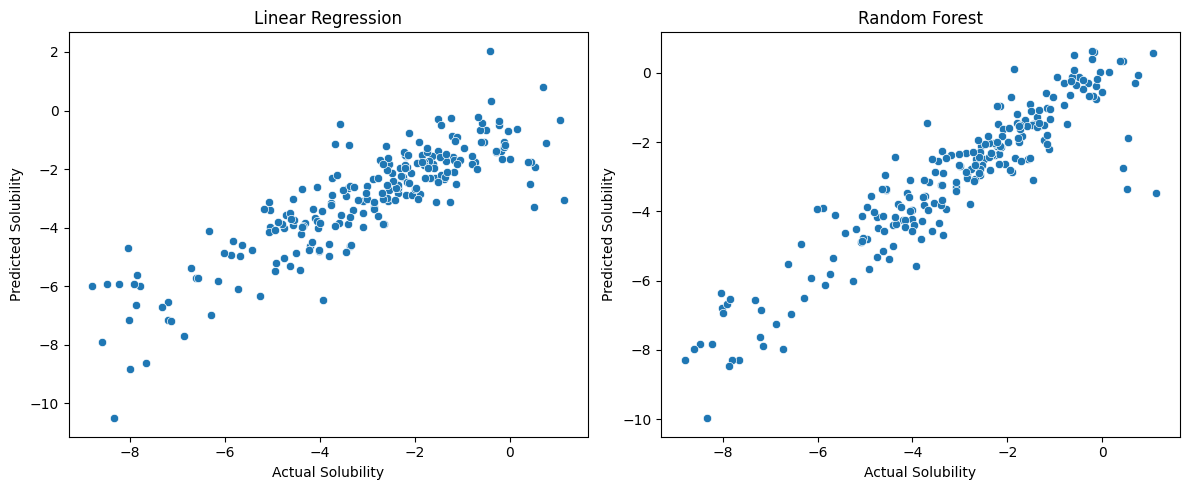

In [28]:
#Visualization of the Predictions
plt.figure(figsize=(12,5))

# Linear Regression
plt.subplot(1,2,1)
sns.scatterplot(x=y_test, y=lr_preds)
plt.xlabel("Actual Solubility")
plt.ylabel("Predicted Solubility")
plt.title("Linear Regression")

# Random Forest
plt.subplot(1,2,2)
sns.scatterplot(x=y_test, y=rf_preds)
plt.xlabel("Actual Solubility")
plt.ylabel("Predicted Solubility")
plt.title("Random Forest")

plt.tight_layout()
plt.show()
